In [ ]:
# apply () axis
# nuskaityti GMP failą (didenįjį), x, y koordinantes konvertuoti į 
# pasaulines ilgumą ir platumą, pridėti gautąsias koordinantes kaip du naujus stulpelius.
# atrinkti tik gaisrus iki 3jų autocisternų ir jų įvykių vietas atvaizduoti plotly express mapbox grafike.
# galite tai atlikti arba jupyter notebooke arba galite panaudoti streamlit skriptą

In [12]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px
import glob
import math

from LKS94WGS84 import *

In [20]:
df = pd.read_csv(r'C:\Users\pauli\Downloads\BPC2.csv')
df.head(1)

,X,Y,ivykio_tipo_kodas,ivykio_id,metai,menuo,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas,object_id
0,455179,6202578,2.1,8a05b17d59f0,2022,3,BPC-GMP,GMP įvykis,1


In [21]:
xw = [] 
yw = []

for i , j in zip(df['X'], df['Y']):
    koord=[]
    koord=grid2geo(i, j)
    xw.append(koord[1])
    yw.append(koord[0])

df['Xwgs']=xw
df['Ywgs']=yw

In [22]:
df.head()

,X,Y,ivykio_tipo_kodas,ivykio_id,metai,menuo,aukstesnis_ivykio_tipas,zemesnis_ivykio_tipas,object_id,Xwgs,Ywgs
0,455179,6202578,2.1,8a05b17d59f0,2022,3,BPC-GMP,GMP įvykis,1,23.282309,55.955301
1,496996,6088060,2.1,c9ffee4c15df,2022,3,BPC-GMP,GMP įvykis,2,23.953132,54.928555
2,396311,6243084,2.1,c349aa73f059,2022,3,BPC-GMP,GMP įvykis,3,22.324267,56.309919
3,509278,6113549,2.1,23b71b2f9a07,2022,3,BPC-GMP,GMP įvykis,4,24.145582,55.157485
4,323452,6174157,6.1.2,a15a6960d21f,2022,3,Policijos įvykiai,KET pažeidimas,5,21.193270,55.669982


In [37]:
dfgaisrai = df[df['zemesnis_ivykio_tipas'].str.contains('Gaisras 0|Gaisras 1', na=False)]

In [31]:
fig = px.scatter_mapbox(data_frame=dfgaisrai, lon='Xwgs', lat='Ywgs', zoom=5)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(width=800, height=600)
fig.show()

In [38]:
print(len(df))
print(len(dfgaisrai))

1970925
18338


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import requests
from datetime import datetime, timedelta

In [50]:
url ='https://api.meteo.lt/v1/stations'

page = requests.get(url)
status = page.status_code
print(status)

200


In [51]:
r = page.json()
# print(r)


In [52]:
df=pd.DataFrame(data=r)
df.head()

,code,name,coordinates
0,akmenes-ams,Akmenės AMS,"{'latitude': 56.24992, 'longitude': 22.73081}"
1,alytaus-ams,Alytaus AMS,"{'latitude': 54.412435, 'longitude': 24.063274}"
2,anyksciu-ams,Anykščių AMS,"{'latitude': 55.51735, 'longitude': 25.1178}"
3,birstono-ams,Birštono AMS,"{'latitude': 54.603217, 'longitude': 24.035802}"
4,birzu-ams,Biržų AMS,"{'latitude': 56.193191, 'longitude': 24.774184}"


In [53]:
url ='https://api.meteo.lt/v1/stations/vilniaus-ams/observations/latest'

page = requests.get(url)
r = page.json()
#df=pd.DataFrame(data=r)

In [68]:
r['observations'][-1]['airTemperature']

9.3

In [75]:
tmp=-300
stotis = ''
for i in df['code']:
    
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/latest'
    page = requests.get(url)
    r = page.json()
    
    if r['observations'][-1]['airTemperature'] > tmp:
        tmp = r['observations'][-1]['airTemperature']
        stotis = i
        
print(tmp)
print(stotis)
    
    

11.9
nidos-ams


In [103]:
t1=-300
t2=-300
t3=-300
s1, s2, s3 = '', '', ''
for i in df['code']:
    
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/latest'
    page = requests.get(url)
    r = page.json()
    
    for j in r['observations']:
        if j['airTemperature'] > t1:
            t1 = j['airTemperature']
            s1=i
        elif j['airTemperature'] > t2:
            t2 = j['airTemperature']
            s2=i
        elif j['airTemperature'] > t3:
            t3 = j['airTemperature']
            s3=i

print(t1, s1)
print(t2, s2)
print(t3, s3)

15.1 kretingos-ams
14.9 pagegiu-ams
14.7 kelmes-ams


In [104]:
td1, td2, td3 = [], [], []
h=[]

for i in [s1]:
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-10-05'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td1.append(j['airTemperature'])
        h.append(j['observationTimeUtc'][11:13])
    
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-10-06'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td1.append(j['airTemperature'])
        h.append(j['observationTimeUtc'][11:13])
        
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/latest'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td1.append(j['airTemperature'])
        h.append(j['observationTimeUtc'][11:13])
        
for i in [s2]:
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-10-05'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td2.append(j['airTemperature'])
    
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-10-06'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td2.append(j['airTemperature'])
        
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/latest'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td2.append(j['airTemperature'])
        
        
for i in [s3]:
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-10-05'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td3.append(j['airTemperature'])
    
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/2024-10-06'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td3.append(j['airTemperature'])
        
    url ='https://api.meteo.lt/v1/stations/'+i+'/observations/latest'
    page = requests.get(url)
    r = page.json()
    for j in r['observations']:
        td3.append(j['airTemperature'])

    
print(td1)
print(td2)
print(td3)

[1.4, 1.1, 0.7, 0.4, 0, 0, 1.9, 6.6, 11, 13.4, 14.7, 13.6, 13.9, 14.4, 13.7, 13, 9.6, 6.5, 4.6, 4.4, 3.7, 2.9, 3.6, 2.6, 2, 1.6, 1.7, 1.5, 1.2, 0.3, 2.7, 6.6, 9.8, 11.8, 12.2, 13.2, 13.7, 13.6, 13.3, 12.3, 9.8, 7.2, 5.3, 4.9, 3.6, 4.2, 3.2, 2.7, 4.9, 3.6, 4.2, 3.2, 2.7, 2.4, 3, 2.9, 2.3, 1.6, 0.8, 2.8, 6.5, 10.1, 12.4, 13.1, 13.6, 14.8, 14.5, 15.1, 13.1, 11.6, 8.7, 6.5]
[9, 8.7, 8.7, 8.4, 8.2, 7.5, 7.1, 10.5, 12.8, 12.2, 13.3, 14.8, 14.5, 15.1, 14.5, 12.6, 11.5, 9.8, 9, 6.7, 6, 5.3, 4, 4.2, 3.5, 3.6, 2.5, 2.2, 2.3, 2.6, 4.6, 8.8, 10.3, 11.9, 12.9, 12.5, 13.2, 13.5, 12.9, 12.5, 11.6, 10.9, 9.5, 10, 9.7, 9.2, 8.8, 8.3, 10, 9.7, 9.2, 8.8, 8.3, 7, 6.5, 6.5, 5.5, 5.8, 5.1, 5.4, 6, 10.1, 11.9, 13.5, 13.1, 13.6, 13.6, 14.9, 12.5, 10.3, 8.7, 7.4]
[8.1, 7.9, 6.1, 4.9, 4.1, 3.2, 4.8, 7.3, 9.9, 11.4, 12.5, 13.3, 14.6, 14.6, 14.5, 11.8, 9.8, 8, 7.3, 5.6, 5.1, 4.2, 2.8, 2.1, 2.1, 1.7, 1.5, 0.6, 1.4, 1.2, 2, 3.8, 7.2, 10, 11.5, 12.6, 13.5, 13.6, 13.3, 10.2, 8.7, 8.1, 7.1, 6.1, 5.8, 5.8, 5.2, 4.9, 6.

ConversionError: Failed to convert value(s) to axis units: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']

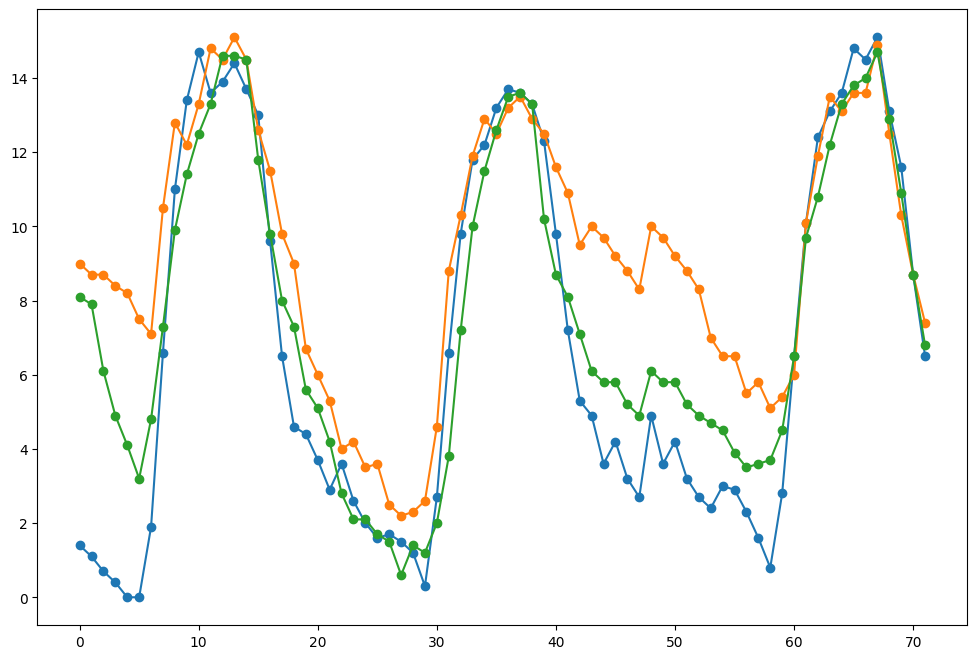

In [107]:
nzn=[]
for i in range (0, 72):
    nzn.append(i)

fig, axis = plt.subplots(figsize=(12, 8))  
axis.plot(nzn, td1, label = s1, marker ='o')
axis.plot(nzn, td2, label = s2, marker ='o')
axis.plot(nzn, td3, label = s3, marker ='o')
axis.set_xticks(h)
axis.legend(loc='best')
plt.title('paskutinės 72 valandos')
plt.show()

In [110]:
print(h)

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '19', '20', '21', '22', '23', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18']
